In [0]:
!pip install pytorch-pretrained-bert
!pip install transformers

In [0]:
import torch
from pytorch_pretrained_bert import BertTokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")

In [0]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer_arabic.vocab.keys():
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')

From perusing the vocab, I'm seeing that:

* The first 999 tokens (1-indexed) appear to be reserved, and most are of the form [unused957].
    * 1   - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.
    * The last whole word is at 29612, "necessitated"

Some funny inclusions:
* starbucks
* triassic
* abolitionist
* 1679

The following code prints out all of the single character tokens in vocabulary, as well as all of the single-character tokens preceded by '##'.

It turns out that these are matching sets--for every standalone character there is also a '##' version. There are 997 single character tokens.

In [0]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)


In [8]:
print('Number of single character tokens:', len(one_chars), '\n')

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 1000 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ¯ ° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ı ĸ ł ŋ œ ŧ ƒ ǁ ə ʃ ʘ ʶ ʿ ˆ
ˉ ˙ ˚ ˛ ˜ α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϡ а б в г д е ж з и
к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я ђ є ѕ і ѽ ҈ ҉ ғ җ қ ҳ ա ե ն ր ־ א ב
ג ד ה ו ז ח ט י כ ל ם מ ן נ ס ע פ ץ צ ק ר ש ת װ ״ ، ؛ ؟ ء ا ب ة ت ث ج ح خ د ذ ر
ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٠ ١ ٢ ٣ ٤ ٥ ٦ ٧ ٨ ٩ ٪ ٫ ٬ ٭ ٱ ٲ ٳ ٹ ٺ ٻ
ټ پ چ ڈ ڋ ڑ ڔ ڕ ژ ڙ ڛ ڠ ڤ ڨ ک ڪ ڬ ڭ گ ڳ ڵ ڷ ڸ ڹ ں ڼ ھ ہ ۃ ۅ ۆ ۇ ۈ ۉ ۋ ی ێ ې ۑ ے
۔ ە ۞ ۩ ۰ ۱ ۲ ۳ ۴ ۵ ۶ ۷ ۸ ۹ ܐ ܓ ܔ ܝ ܨ ܪ ऋ क द न र ह ा ि ी ॐ १ ঔ ন র া ি ে ৲ ৴ ৵
ਿ ੀ ઇ હ ஃ இ ஊ ஐ ஓ ஜ ண த ஷ ஹ ி ಏ ಞ ೂ ೕ ก ค ง ฒ ด ต ท น บ ป ม ย ร ล ว ส ห อ ะ า ฿
เ แ ไ ๏ ๑ ༄ ა დ ი ო რ ღ წ ჲ ჻ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄋ ᄌ ᄎ ᄐ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅮ ᅳ ᅵ ᆨ ᆫ ᆯ
ᆷ ᆼ ᵜ – — ‗ ‘ ’ ‚ “ ” „ † ‡ • … ‰ ″ ‹ › ‼ ‾ ‿ ⁄ ₡ ₩ ₪ ₫ € ₹ ⃣ ℃ ℓ ™ ← ↑ → ↓ ↕ 

In [9]:
print('Number of single character tokens with hashes:', len(one_chars_hashes), '\n')

# Print all of the single characters, 40 per row.

# Strip the hash marks, since they just clutter the display.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# For every batch of 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(tokens) + 1)
    
    # Print out the tokens, separated by a space.
    print(' #'.join(tokens[i:end]))

Number of single character tokens with hashes: 749 

e #s #o #p #l #ي #د #ل #ر #ز #س #ـ #ح #و #ا #ك #ج #ن #م #i #r #c #t #خ #h #m #a #ع #ه #ش #ص #ف #ق #ب #ط #ى #3 #4 #7 #ء
ت #ض #ة #n #y #j #k #8 #1 #u #g #0 #6 #5 #ث #2 #غ #ظ #ھ #b #v #q #z #ł #w #x #d #9 #ذ #f #ی #٠ #¤ #ᅧ #ᆼ #ᄋ #ᅮ #а #р #ь
е #н #ы #👏 #१ #и #м #о #ڤ #🌹 #ﻷ #ﻴ #ﻜ #ﻨ #ﻲ #👍 #ٱ #あ #る #け #た #か #ら #➖ #л #к #г #€ #™ #র #া #ন #پ #ﻟ #ﻤ #ﻌ #ﺎ #ﻣ #ﻠ #ە
گ #т #б #у #п #с #٢ #🏼 #ﻳ #χ #ε #τ #ι #ζ #ο #ν #α #٦ #٩ #٧ #ۃ #न #ﺘ #ﺤ #ﻬ #٥ #і #х #ю #๑ #в #я #ﺨ #ﺼ #ﺔ #ч #٣ #ш #ョ #ロ
œ #ﻻ #♫ #٤ #١ #ﻧ #ک #す #く #に #۶ #۳ #ﻫ #ﻔ #ﻦ #ա #ր #ն #з #д #ж #い #う #こ #と #を #て #® #ﻥ #ﻮ #ﺛ #ﺋ #ﻖ #³ #× #ے #ि #द #ी #→
め #の #ト #ラ #イ #ー #ﻢ #ミ #♡ #چ #ə #ı #ﺗ #ڑ #ﯾ #щ #ﺒ #● #ﺭ #ﻪ #ᅡ #ᆷ #ᄌ #ᅩ #ᄉ #ᅥ #ᆫ #ﻹ #ﺠ #ﺰ #ﻱ #ב #י #ת #ღ #ﺧ #ﻼ #き #😂 #מ
ל #ו #נ #۱ #۸ #۴ #も #よ #ц #´ #° #ה #ש #า #ว #ร #ก #ล #ф #ڭ #ﻓ #ﺪ #ﺮ #ﻩ #し #お #ア #ク #ﻃ #э #ہ #ﺳ #ﺲ #ﻭ #ڷ #♛ #▪ #ﮧ #ﺜ #٨
ﺿ #ﺍ #ﺏ #ﭬ #ি #ย #ח #۩ #ø #😍 #ˆ #¦ #¥ #פ #ד #ে #ѕ #ﺩ #💚 #れ #ま #っ #は #ﺻ #ﺣ #◦ #♥ #ஓ #ᄆ #ᅵ #ᅳ #ٹ #ڈ #テ #サ #ン #さ #フ #

In [10]:
print('Are the two sets identical?', set(one_chars) == set(tokens))
#1000 - 749 ) 7rf msh mwgod zyhom fe nos el klma

Are the two sets identical? False


### Subwords vs. Whole-words
Let's gather some statistics on the vocabulary.



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Maximum token length: 34


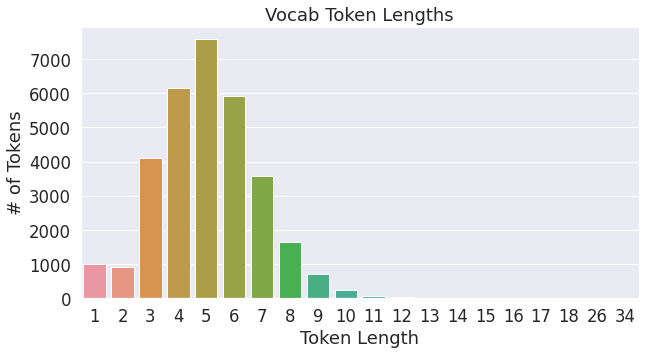

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))
#aktr el klmat 5 7rof w feh klmat 34 7rf

Let's look at just the tokens which begin with '##'.

In [0]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)


How many '##' tokens are there vs. the full vocab?

In [13]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Number of subwords: 6,946 of 32,000
21.7%


Plot the subword lengths (not including the two '##' characters).

Text(0, 0.5, '# of ## Subwords')

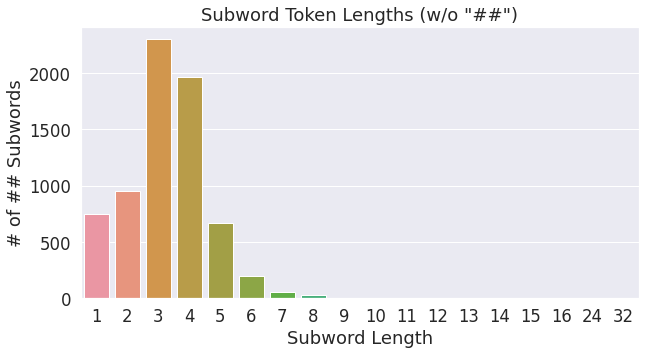

In [14]:
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')
#3 7rof mn wst el klma aktr 7aga motshabha

### Misspellings

In [17]:
'معتز' in tokenizer.vocab # Right

True

In [19]:
'امعتز' in tokenizer.vocab # Wrong

False

In [21]:
'مهندس' in tokenizer.vocab # Right

True

In [0]:
'هندسه' in tokenizer.vocab # Wrong

False

In [26]:
'مدرسة' in tokenizer.vocab # Right

True

In [25]:
'مدرسه' in tokenizer.vocab # Wrong #el klmat el mktopa 3'lt msh mwgoda dah 3shan gya mn books

False

In [0]:
'separate' in tokenizer.vocab # Right

True

In [0]:
'seperate' in tokenizer.vocab # Wrong

False

What about contractions?

In [31]:
"استاذ" in tokenizer.vocab

True

In [32]:
"أستاذ" in tokenizer.vocab

False

### Start vs. Mid Subwords

For single characters, there are both the individual character and the '##' version for every character. Is the same true of subwords?

In [33]:
# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ية


In [35]:
'##ون' in tokenizer.vocab #يلعبون

True

In [36]:
'ان' in tokenizer.vocab

True

### Names



In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=97fcba8d47d5f818c5e3dc4b5c355474c4337b758065355989ee2b40ca73ed15
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names.txt'

In [0]:
# Read them in.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decode the names, convert to lowercase, and strip newlines.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))


Number of names: 21,985
Example: umberto


In [0]:
num_names = 0

# For each name in our list...
for name in names:

    # If it's in the vocab...
    if name in tokenizer.vocab:
        # Tally it.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))

3,869 names in the vocabulary


**Further Research**
* Add more modern names
    * This repo / file contains some more modern names. The file download isn't working, though.
    * `https://raw.githubusercontent.com/arineng/arincli/master/lib/male-first-names.txt`
* Add common names from other languages.


### Numbers

In [0]:
# Count how many numbers are in the vocabulary.
count = 0

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():

    # Tally if it's a number.
    if token.isdigit():
        count += 1
        
        # Any numbers >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocab includes {:,} numbers.'.format(count))

Vocab includes 881 numbers.


In [0]:
# Count how many dates between 1600 and 2021 are included.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocab includes {:,} of 421 dates from 1600 - 2021'.format(count))

Vocab includes 384 of 421 dates from 1600 - 2021
